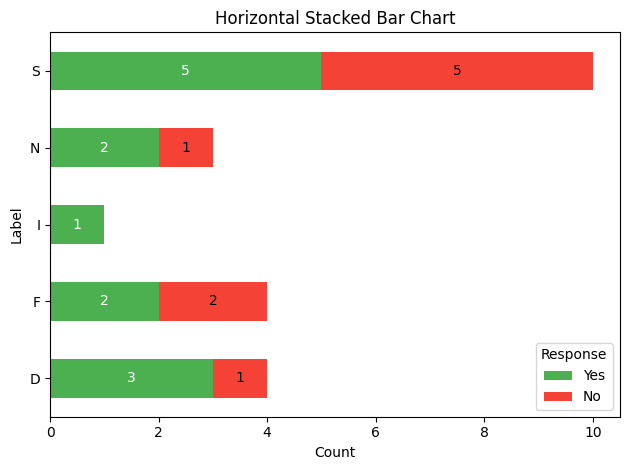

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('bar_assignment.csv')

# Transform 1 to "Yes" and 0 to "No"
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Group by LABEL and Response, then count occurrences
counts = df.groupby(['LABEL', 'Response']).size().unstack(fill_value=0)

# Reorder columns to ensure "Yes" is plotted first (left side)
counts = counts[['Yes', 'No']]

# Create a horizontal stacked bar chart
ax = counts.plot(kind='barh', stacked=True, color=['#4CAF50', '#F44336'])

for index, (yes, no) in enumerate(zip(counts['Yes'], counts['No'])):
    if yes > 0:
        plt.text(yes / 2, index, str(yes), color='white', va='center', ha='center')
    if no > 0:
        plt.text(yes + no / 2, index, str(no), color='black', va='center', ha='center')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Horizontal Stacked Bar Chart')
plt.legend(title='Response')

# Display the plot
plt.tight_layout()
plt.show()